In [1]:
#Assignment 2B
#Lanke Gauri 151

In [2]:
import pandas as pd

In [3]:
# Load the dataset
df=pd.read_csv("employee_dataset.csv")
df.head() #first 5 rows

,EmpID,Name,Age,Gender,Department,Salary,JoiningDate,PerformanceScore,WorkHours
0,1,Employee_1,50,Female,Sales,90000.0,2015-01-01,3.0,43.0
1,2,Employee_2,36,Male,Finance,62500.0,2015-01-02,2.0,54.0
2,3,Employee_3,29,Male,Finance,39500.0,2015-01-03,1.0,54.0
3,4,Employee_4,42,Male,Sales,35000.0,2015-01-04,4.0,37.0
4,5,Employee_5,40,Male,Finance,41500.0,2015-01-05,4.0,37.0


In [4]:
df.tail() #last 5 rows

,EmpID,Name,Age,Gender,Department,Salary,JoiningDate,PerformanceScore,WorkHours
995,996,Employee_996,34,Female,HR,31000.0,2017-09-22,2.0,36.0
996,997,Employee_997,51,Female,IT,56500.0,2017-09-23,1.0,44.0
997,998,Employee_998,44,Male,Finance,98000.0,2017-09-24,4.0,51.0
998,999,Employee_999,40,Female,Sales,64500.0,2017-09-25,1.0,53.0
999,1000,Employee_1000,53,Female,Sales,86000.0,2017-09-26,5.0,40.0


In [5]:
df.info() #info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmpID             1000 non-null   int64  
 1   Name              1000 non-null   object 
 2   Age               1000 non-null   int64  
 3   Gender            1000 non-null   object 
 4   Department        1000 non-null   object 
 5   Salary            995 non-null    float64
 6   JoiningDate       1000 non-null   object 
 7   PerformanceScore  823 non-null    float64
 8   WorkHours         963 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 70.4+ KB


In [6]:
df['Salary'] = pd.to_numeric(df['Salary'])
df['PerformanceScore'] = pd.to_numeric(df['PerformanceScore'])
df['WorkHours'] = pd.to_numeric(df['WorkHours'])
print(df.dtypes) #data types of each column

EmpID                 int64
Name                 object
Age                   int64
Gender               object
Department           object
Salary              float64
JoiningDate          object
PerformanceScore    float64
WorkHours           float64
dtype: object


In [7]:
print("before NAN filling")
df.isnull().sum()

before NAN filling


EmpID                 0
Name                  0
Age                   0
Gender                0
Department            0
Salary                5
JoiningDate           0
PerformanceScore    177
WorkHours            37
dtype: int64

In [8]:
df["WorkHours"].fillna(df["WorkHours"].mean(),inplace=True) #filling missing values in WorkHours column with mean value of that column

df["PerformanceScore"].fillna(df["PerformanceScore"].median(),inplace=True) #filling missing values in Performance Score column with mean value of that column

df["Salary"].fillna(df["Salary"].mean(),inplace=True) #filling missing values in Salary column with mean value of that column
print("after NAN filling")
df.isnull().sum()

after NAN filling


C:\Users\SAINATH\AppData\Local\Temp\ipykernel_96524\2048120008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["WorkHours"].fillna(df["WorkHours"].mean(),inplace=True) #filling missing values in WorkHours column with mean value of that column
C:\Users\SAINATH\AppData\Local\Temp\ipykernel_96524\2048120008.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because

EmpID               0
Name                0
Age                 0
Gender              0
Department          0
Salary              0
JoiningDate         0
PerformanceScore    0
WorkHours           0
dtype: int64

In [9]:
df.duplicated().sum()  #checking for duplicate rows

np.int64(0)

In [10]:
print(df.groupby("Department")["Salary"].mean()) #average salary by department

Department
Finance      62483.173077
HR           64678.213055
IT           59035.502959
Marketing    63694.335313
Sales        62329.769926
Name: Salary, dtype: float64


In [11]:
print(df.groupby("Gender")["WorkHours"].mean()) #average performance score by

Gender
Female    45.250433
Male      45.107924
Name: WorkHours, dtype: float64


In [12]:
df.groupby(["Department","Age"])["Salary"].mean() #average salary by department and age

Department  Age
Finance     22     63312.500000
            23     70833.333333
            24     54750.000000
            25     69700.000000
            26     73700.000000
                       ...     
Sales       55     40900.000000
            56     59142.857143
            57     65857.142857
            58     59285.714286
            59     67000.000000
Name: Salary, Length: 188, dtype: float64

In [13]:
df.groupby('Department')['Salary'].agg(['mean','max','min','count']) #mean, max, min and count of salary by department


,mean,max,min,count
Department,,,,
Finance,62483.173077,99500.0,25000.0,208
HR,64678.213055,100000.0,25000.0,191
IT,59035.502959,97500.0,25000.0,169
Marketing,63694.335313,100000.0,25000.0,209
Sales,62329.769926,100000.0,25500.0,223


In [14]:
df.groupby('Department')['PerformanceScore'].agg(['mean','max','min','count'])

,mean,max,min,count
Department,,,,
Finance,2.985577,5.0,1.0,208
HR,2.963351,5.0,1.0,191
IT,3.071006,5.0,1.0,169
Marketing,2.971292,5.0,1.0,209
Sales,3.035874,5.0,1.0,223


<Axes: ylabel='Frequency'>

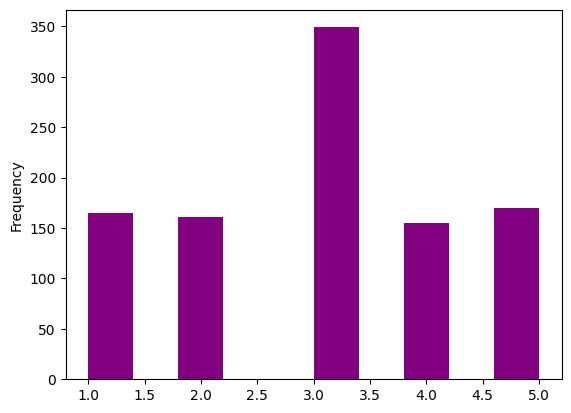

In [15]:
df["PerformanceScore"].plot(kind="hist",color="purple") #histogram of salary

<Axes: >

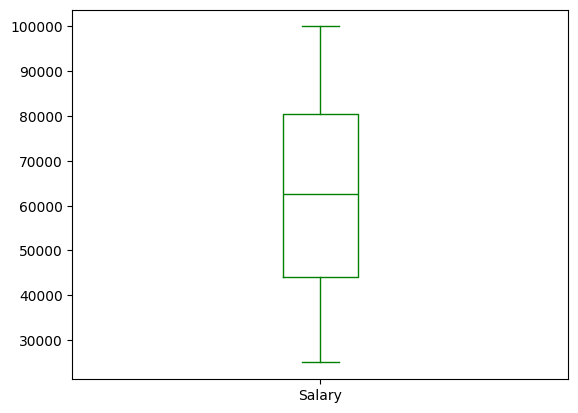

In [16]:
df["Salary"].plot(kind="box",color="green") #box plot of salary

<Axes: ylabel='Frequency'>

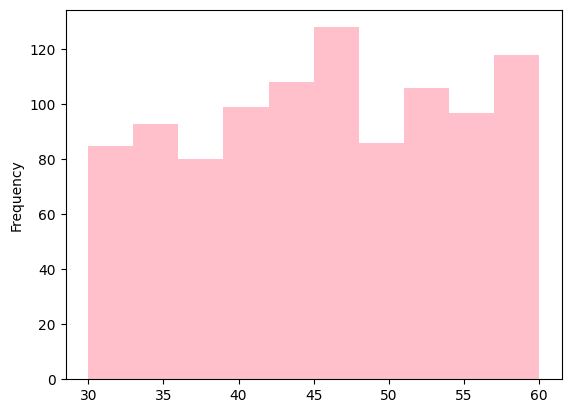

In [17]:
df["WorkHours"].plot(kind="hist",color="pink") #box plot of salary

<Axes: xlabel='Department', ylabel='WorkHours'>

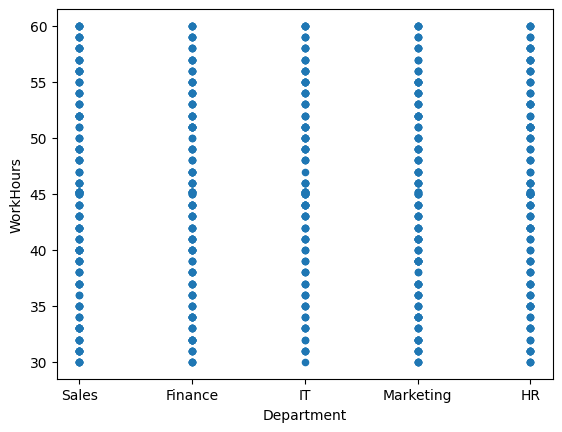

In [18]:
df.plot(kind="scatter",x="Department",y="WorkHours") #scatter plot between salary and performance score